# Importando bibliotecas necessárias

In [20]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# *Importando conteúdo do CSV disponibilizado*

In [2]:
df = pd.read_csv('custos-seguro-saude.csv')

# Exibindo alguns registros do data frame

In [3]:
df.head()

,idade,gênero,imc,filhos,fumante,região,encargos
0,56,feminino,29.774374,2,sim,sudoeste,31109.889763
1,46,masculino,25.857395,1,não,nordeste,26650.702647
2,32,masculino,23.014840,0,não,sudoeste,21459.037990


In [5]:
df.describe()

,idade,imc,filhos,encargos
count,3.000000,3.000000,3.0,3.000000
mean,44.666667,26.215536,1.0,26406.543467
std,12.055428,3.393969,1.0,4830.056445
min,32.000000,23.014840,0.0,21459.037990
25%,39.000000,24.436117,0.5,24054.870319
50%,46.000000,25.857395,1.0,26650.702647
75%,51.000000,27.815884,1.5,28880.296205
max,56.000000,29.774374,2.0,31109.889763


# **Gerando dados fictícios para alimentar a base a ser explorada:**

In [10]:
def generate_fake_data(num_samples):
    fake_data = []
    for _ in range(num_samples):
        idade = random.randint(18, 70)
        genero = random.choice(['masculino', 'feminino'])
        imc = round(random.uniform(18, 35), 1)
        filhos = random.randint(0, 4)
        fumante = random.choice(['sim', 'não'])
        regiao = random.choice(['norte', 'nordeste', 'sudeste', 'sul', 'centro-oeste'])
        encargos = round(random.uniform(15000, 50000), 2)
        fake_data.append([idade, genero, imc, filhos, fumante, regiao, encargos])
    return fake_data

# Gerar 1000 dados fictícios
fake_data = generate_fake_data(1000)

# Converter para DataFrame do Pandas
df = pd.DataFrame(fake_data, columns=['idade', 'gênero', 'imc', 'filhos', 'fumante', 'região', 'encargos'])

# Salvar em um arquivo CSV
df.to_csv('dados_ficticios.csv', index=False)

# Análise de estatísticas da base gerada

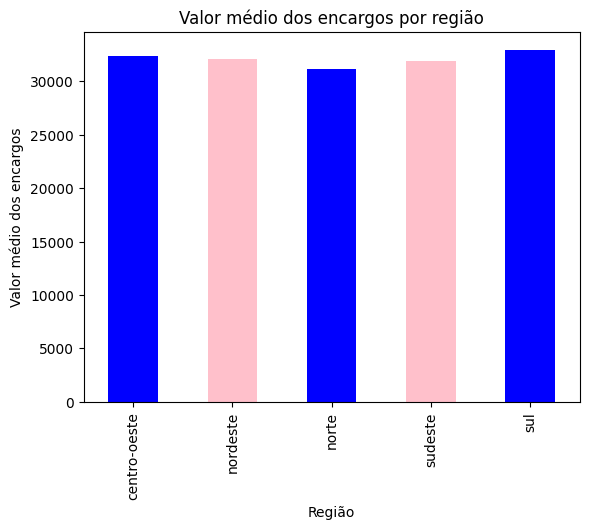

In [16]:
df = pd.read_csv('dados_ficticios.csv')

# Calcular o valor médio dos encargos por regiao
mean_encargos_por_genero = df.groupby('região')['encargos'].mean()

# Criar o gráfico de barras
mean_encargos_por_genero.plot(kind='bar', color=['blue', 'pink'])

# Adicionar rótulos e título ao gráfico
plt.xlabel('Região')
plt.ylabel('Valor médio dos encargos')
plt.title('Valor médio dos encargos por região')

# Exibir o gráfico
plt.show()

# Pré-processamento

In [17]:
# Converter colunas categóricas em numéricas
df['gênero'] = pd.get_dummies(df['gênero'], drop_first=True)  # Codificação one-hot para gênero
df['fumante'] = df['fumante'].map({'sim': 1, 'não': 0})  # Codificação de rótulos para fumante
df = pd.get_dummies(df, columns=['região'], drop_first=True)  # Codificação one-hot para região

# Visualizar os dados após a conversão
print(df.head())

   idade  gênero   imc  filhos  fumante  encargos  região_nordeste  \
0     40    True  20.4       1        0  41165.97            False   
1     35    True  24.9       2        1  29650.61            False   
2     28   False  27.8       1        0  31185.41            False   
3     56    True  28.7       0        1  19628.32            False   
4     59    True  18.9       0        0  40523.92            False   

   região_norte  região_sudeste  região_sul  
0         False            True       False  
1          True           False       False  
2         False            True       False  
3         False            True       False  
4          True           False       False  


In [19]:
# Definir as features (X) e o alvo (y)
X = df.drop('encargos', axis=1)  # Todas as colunas exceto 'encargos' são features
y = df['encargos']  # 'encargos' é o alvo

# Dividir os dados em conjunto de treinamento e teste (por exemplo, 80% para treinamento e 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar o tamanho dos conjuntos de treinamento e teste
print("Tamanho do conjunto de treinamento:", len(X_train))
print("Tamanho do conjunto de teste:", len(X_test))

Tamanho do conjunto de treinamento: 800
Tamanho do conjunto de teste: 200


# Usando algoritmo de regressão linear

In [22]:
# Criar uma instância do modelo de regressão linear
model = LinearRegression()

# Treinar o modelo usando os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Avaliando o modelo

Erro quadrático médio (MSE): 96792980.53028938
Coeficiente de determinação (R²): -0.051208505566525675


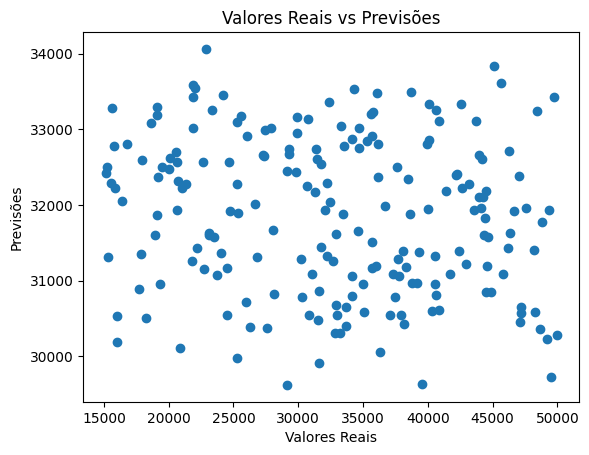

In [23]:
# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro quadrático médio (MSE):", mse)
print("Coeficiente de determinação (R²):", r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs Previsões')
plt.show()